# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [10]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [14]:
column_names = ('City Name', 'Cloudiness(%)', 'Country', 'Date', 'Humidity(%)', 'Latitude', 'Longitude',
               'Maximum_temp(f)', 'Wind Speed(mph)')
cities_names_df = pd.DataFrame(columns = column_names)
cities_names_df


,City Name,Cloudiness(%),Country,Date,Humidity(%),Latitude,Longitude,Maximum_temp(f),Wind Speed(mph)


### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = "imperial"

# example request
query_url = base_url +"&units=" + units + "&q="
'''
response = requests.get(query_url + 'saint Louis')
jpull = response.json()
print(jpull['sys']['country'])
'''




"\nresponse = requests.get(query_url + 'saint Louis')\njpull = response.json()\nprint(jpull['sys']['country'])\n"

In [16]:


# Your code here. A loop maybe? 
#NOTE: API calls can be slow. They can also be limited. Once you have a list try not to rerun all API calls very often. 

search_data = []
city_List = []
country_List = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        country = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(country)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: bengkulu
Record found for city: bengkulu with city id: 1649150
Processing record 1 for the city: sobolevo
Record found for city: sobolevo with city id: 525426
Processing record 2 for the city: kodiak
Record found for city: kodiak with city id: 5866583
Processing record 3 for the city: sri aman
Record found for city: sri aman with city id: 1735799
Processing record 4 for the city: thompson
Record found for city: thompson with city id: 6165406
Processing record 5 for the city: kununurra
Record found for city: kununurra with city id: 2068110
Processing record 6 for the city: antofagasta
Record found for city: antofagasta with city id: 3899539
Processing record 7 for the city: yellowknife
Record found for city: yellowknife with city id: 6185377
Processing record 8 for the city: port elizabeth
Record found for city: port elizabeth with city id: 964420
Processing record 9 for the

Record found for city: tuktoyaktuk with city id: 6170031
Processing record 85 for the city: olinda
Record found for city: olinda with city id: 3393536
Processing record 86 for the city: aksarka
Record found for city: aksarka with city id: 1512019
Processing record 87 for the city: yeletskiy
No weather record found for city: yeletskiy
Processing record 88 for the city: qaanaaq
Record found for city: qaanaaq with city id: 3831208
Processing record 89 for the city: cherskiy
Record found for city: cherskiy with city id: 2126199
Processing record 90 for the city: jamestown
Record found for city: jamestown with city id: 5122534
Processing record 91 for the city: new norfolk
Record found for city: new norfolk with city id: 2155415
Processing record 92 for the city: mahebourg
Record found for city: mahebourg with city id: 934322
Processing record 93 for the city: tyazhinskiy
Record found for city: tyazhinskiy with city id: 1488838
Processing record 94 for the city: eureka
Record found for city

Record found for city: atbasar with city id: 1526038
Processing record 169 for the city: arraial do cabo
Record found for city: arraial do cabo with city id: 3471451
Processing record 170 for the city: muravlenko
Record found for city: muravlenko with city id: 1540711
Processing record 171 for the city: tazovskiy
Record found for city: tazovskiy with city id: 1489853
Processing record 172 for the city: toora-khem
Record found for city: toora-khem with city id: 1489401
Processing record 173 for the city: roma
Record found for city: roma with city id: 5134295
Processing record 174 for the city: sarakhs
Record found for city: sarakhs with city id: 1159716
Processing record 175 for the city: nizhneyansk
No weather record found for city: nizhneyansk
Processing record 176 for the city: maniitsoq
Record found for city: maniitsoq with city id: 3421982
Processing record 177 for the city: calamar
Record found for city: calamar with city id: 3687972
Processing record 178 for the city: manzhouli
R

Record found for city: casas grandes with city id: 4015076
Processing record 253 for the city: nishihara
Record found for city: nishihara with city id: 1855342
Processing record 254 for the city: karratha
Record found for city: karratha with city id: 6620339
Processing record 255 for the city: mehamn
Record found for city: mehamn with city id: 778707
Processing record 256 for the city: campos gerais
Record found for city: campos gerais with city id: 3467680
Processing record 257 for the city: solnechnyy
Record found for city: solnechnyy with city id: 2016307
Processing record 258 for the city: dunedin
Record found for city: dunedin with city id: 2191562
Processing record 259 for the city: haibowan
No weather record found for city: haibowan
Processing record 260 for the city: kavieng
Record found for city: kavieng with city id: 2094342
Processing record 261 for the city: urumqi
Record found for city: urumqi with city id: 1529102
Processing record 262 for the city: nakapiripirit
Record f

Record found for city: saint-augustin with city id: 6137462
Processing record 337 for the city: hun
Record found for city: hun with city id: 2216645
Processing record 338 for the city: asyut
Record found for city: asyut with city id: 359783
Processing record 339 for the city: fairbanks
Record found for city: fairbanks with city id: 5861897
Processing record 340 for the city: taltal
Record found for city: taltal with city id: 3870243
Processing record 341 for the city: englewood
Record found for city: englewood with city id: 5421250
Processing record 342 for the city: airai
Record found for city: airai with city id: 1651810
Processing record 343 for the city: noumea
Record found for city: noumea with city id: 2139521
Processing record 344 for the city: ravar
Record found for city: ravar with city id: 118704
Processing record 345 for the city: shingu
Record found for city: shingu with city id: 1847947
Processing record 346 for the city: velke karlovice
Record found for city: velke karlov

Record found for city: alice springs with city id: 2077895
Processing record 423 for the city: naze
Record found for city: naze with city id: 1855540
Processing record 424 for the city: mocuba
Record found for city: mocuba with city id: 1024312
Processing record 425 for the city: katangli
Record found for city: katangli with city id: 2122783
Processing record 426 for the city: bougouni
Record found for city: bougouni with city id: 2459775
Processing record 427 for the city: aykhal
Record found for city: aykhal with city id: 2027296
Processing record 428 for the city: cedar city
Record found for city: cedar city with city id: 5536630
Processing record 429 for the city: abha
Record found for city: abha with city id: 110690
Processing record 430 for the city: vrede
Record found for city: vrede with city id: 942701
Processing record 431 for the city: paracuru
Record found for city: paracuru with city id: 3393115
Processing record 432 for the city: abu samrah
Record found for city: abu samr

Record found for city: vetlanda with city id: 2663293
Processing record 506 for the city: san juan
Record found for city: san juan with city id: 3837213
Processing record 507 for the city: mayumba
Record found for city: mayumba with city id: 2399001
Processing record 508 for the city: auki
Record found for city: auki with city id: 2109701
Processing record 509 for the city: hofn
Record found for city: hofn with city id: 2630299
Processing record 510 for the city: bandarbeyla
Record found for city: bandarbeyla with city id: 64814
Processing record 511 for the city: maarianhamina
Record found for city: maarianhamina with city id: 3041732
Processing record 512 for the city: estelle
Record found for city: estelle with city id: 4323873
Processing record 513 for the city: athabasca
Record found for city: athabasca with city id: 5887916
Processing record 514 for the city: agropoli
Record found for city: agropoli with city id: 6541176
Processing record 515 for the city: tarakan
Record found fo

Record found for city: yuli with city id: 2317982
Processing record 590 for the city: palmer
Record found for city: palmer with city id: 4946620
Processing record 591 for the city: evensk
Record found for city: evensk with city id: 2125693
Processing record 592 for the city: manokwari
Record found for city: manokwari with city id: 1636308
Processing record 593 for the city: te anau
Record found for city: te anau with city id: 2181625
Processing record 594 for the city: homer
Record found for city: homer with city id: 5864145
Processing record 595 for the city: jian
Record found for city: jian with city id: 1806445
Processing record 596 for the city: kaeo
Record found for city: kaeo with city id: 2189343
Processing record 597 for the city: chake chake
Record found for city: chake chake with city id: 160677
Processing record 598 for the city: sabang
Record found for city: sabang with city id: 1214026
Processing record 599 for the city: aurora
Record found for city: aurora with city id: 5

In [6]:
len(search_data)

555

### Convert Raw Data to DataFrame
* OPTIONAL: Export the city data into a .csv.
* Display the DataFrame

In [10]:

lat_info =  [data.get("coord").get("lat") for data in search_data]
lng_info = [data.get("coord").get("lon") for data in search_data]
temp_info = [data.get("main").get("temp") for data in search_data]
humid_info = [data.get("main").get("humidity") for data in search_data]
cloud_info =[data.get("clouds").get("all") for data in search_data]
wind_info = [data.get("wind").get("speed") for data in search_data]



In [11]:
weather_info = pd.DataFrame({"cityName":city_List,
                            "country":country_List,
                            "lat":lat_info,
                            "lng":lng_info,
                            "temp":temp_info,
                            "humidity":humid_info,
                            "cloudiness":cloud_info,
                            "winds":wind_info})
weather_info


,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,airai,TL,-8.9266,125.4092,58.39,86,98,3.42
1,hermiston,US,45.8404,-119.2895,56.37,26,1,8.34
2,ushuaia,AR,-54.8000,-68.3000,46.40,57,20,4.61
3,busselton,AU,-33.6500,115.3333,57.99,97,39,4.99
4,jamestown,US,42.0970,-79.2353,58.26,28,75,3.44
...,...,...,...,...,...,...,...,...
550,puteyets,RU,65.1716,57.0910,22.59,93,75,4.83
551,batemans bay,AU,-35.7167,150.1833,62.06,97,98,1.99
552,beringovskiy,RU,63.0500,179.3167,7.95,94,100,16.17
553,tessalit,ML,20.1986,1.0114,87.30,6,16,6.64


In [12]:
weather_info = weather_info[["cityName","country","lat","lng","temp","humidity","cloudiness","winds"]]
weather_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cityName    555 non-null    object 
 1   country     555 non-null    object 
 2   lat         555 non-null    float64
 3   lng         555 non-null    float64
 4   temp        555 non-null    float64
 5   humidity    555 non-null    int64  
 6   cloudiness  555 non-null    int64  
 7   winds       555 non-null    float64
dtypes: float64(4), int64(2), object(2)
memory usage: 30.4+ KB


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* OPTIONAL: Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

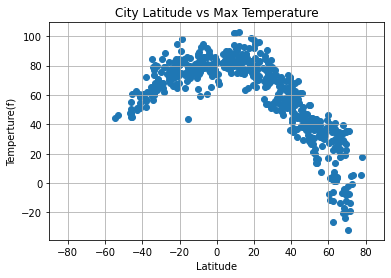

In [31]:
#Latitude vs max Temperature
plt.scatter(weather_info["lat"], weather_info['temp'], marker = "o")

#add chart labels
plt.title("City Latitude vs Max Temperature")
plt.ylabel("Temperture(f)")
plt.xlabel("Latitude")
plt.grid("true")
plt.xlim(-90,90)

#save the figure
plt.savefig("Lat_vs_maxtemp.png")
#show plot
plt.show()


#### Latitude vs. Humidity Plot

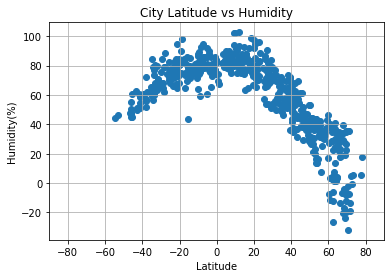

In [34]:
#Latitude vs max Humidity
plt.scatter(weather_info["lat"], weather_info['temp'], marker = "o")

#add chart labels
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

#save the figure
plt.savefig("Lat_vs_Humidity.png")
#show plot
plt.show()



#### Latitude vs. Cloudiness Plot

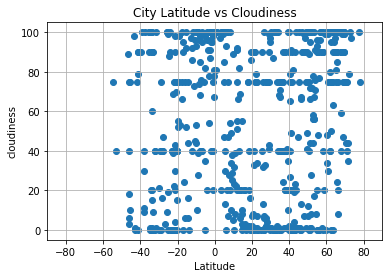

In [40]:
#Latitude vs Cloudiness
plt.scatter(weather_info["lat"], weather_info["cloudiness"], marker="o")

# Add chart labels
plt.title("City Latitude vs Cloudiness")
plt.ylabel("cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

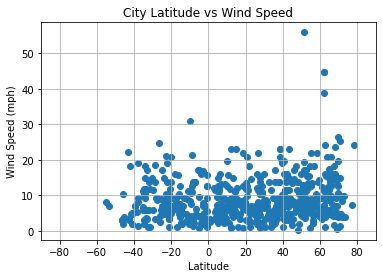

In [39]:
#Latitude vs Wind speed
plt.scatter(weather_info["lat"], weather_info["wind"], marker="o")

# Add chart labels
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim(-90,90)

# Save the figure
plt.savefig("Lat_vs_WindSpeed.png")

# Show plot
plt.show()

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [20]:
lat_info =  [data.get("coord").get("lat") for data in search_data]
lng_info = [data.get("coord").get("lon") for data in search_data]
temp_info = [data.get("main").get("temp") for data in search_data]
humid_info = [data.get("main").get("humidity") for data in search_data]
cloud_info =[data.get("clouds").get("all") for data in search_data]
wind_info = [data.get("wind").get("speed") for data in search_data]


In [22]:
weather_info = pd.DataFrame({"cityName":city_List,
                            "country":country_List,
                            "lat":lat_info,
                            "lng":lng_info,
                            "temp":temp_info,
                            "humidity":humid_info,
                            "cloudiness":cloud_info,
                            "winds":wind_info})
weather_info
weather_info.head()

,cityName,country,lat,lng,temp,humidity,cloudiness,winds
0,bengkulu,ID,-3.8004,102.2655,76.28,86,100,4.97
1,sobolevo,RU,54.4299,31.8996,40.84,54,100,6.78
2,kodiak,US,57.7900,-152.4072,30.20,64,1,5.75
3,sri aman,MY,1.2376,111.4621,77.00,94,73,2.17
4,thompson,CA,55.7435,-97.8558,28.40,93,90,10.36


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




<AxesSubplot:xlabel='temp', ylabel='Density'>

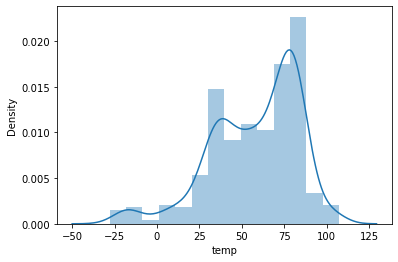

In [32]:
sns.distplot(weather_info.temp)

<AxesSubplot:xlabel='temp', ylabel='winds'>

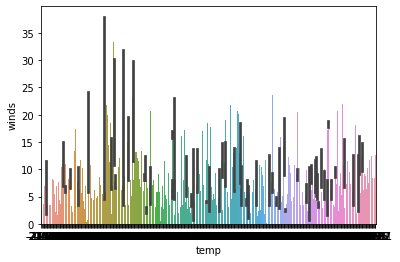

In [44]:
sns.barplot(x = "temp", y = "winds", data = weather_info)


### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [ ]:
Temperature increases as we approach theequator.
However, tempertature peaks at around 20 degrees latitude, not exactly at the equatorial line.
This may be due to the Earth's tilt in the axis known as obliquity.

Cloudiness and Humidity do not show a strong correlation to latitude.
The visualization below show a great varity of values at similar latitude.

Wind speed appears to slightly increase as we move away from the equator.
we would need to go beyond the ranged examined to make a definitive conclusion.


### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

In [ ]:
pro.openweathermap.org/data/2.5/forecast/hourly?q={city name}&appid= API key

In [47]:

# OpenWeatherMap API Key
api_key = api_keys.api_key

# base url for getting api data
base_url = "http://api.openweathermap.org/data/2.5/forecast/hourly?q={city name}&appid=" + api_key
units = "imperial"

# example request
query_url = base_url +"&units=" + units + "&q="
'''
response = requests.get(query_url + 'saint Louis')
jpull = response.json()
print(jpull['sys']['country'])
'''





"\nresponse = requests.get(query_url + 'saint Louis')\njpull = response.json()\nprint(jpull['sys']['country'])\n"

In [48]:
search_data = []
city_List = []
country_List = []


searchCnt = 0
print("Begin API Call to OpenWeather Database ")
print("---------------------------------------")

for city in cities:
    try:
        print(f"Processing record {searchCnt} for the city: {city}")
        searchCnt += 1
        response = requests.get(query_url + city)
        jpull = response.json()
        country = jpull['sys']['country']
        searchCityID = jpull['id']
        search_data.append(jpull)
        city_List.append(city)
        country_List.append(country)
        print(f"Record found for city: {city} with city id: {searchCityID}")
    except Exception as ex:
        print(f"No weather record found for city: {city}")
        pass


print("---------------------------------------")
print("Processing Complete")

Begin API Call to OpenWeather Database 
---------------------------------------
Processing record 0 for the city: bengkulu
No weather record found for city: bengkulu
Processing record 1 for the city: sobolevo
No weather record found for city: sobolevo
Processing record 2 for the city: kodiak
No weather record found for city: kodiak
Processing record 3 for the city: sri aman
No weather record found for city: sri aman
Processing record 4 for the city: thompson
No weather record found for city: thompson
Processing record 5 for the city: kununurra
No weather record found for city: kununurra
Processing record 6 for the city: antofagasta
No weather record found for city: antofagasta
Processing record 7 for the city: yellowknife
No weather record found for city: yellowknife
Processing record 8 for the city: port elizabeth
No weather record found for city: port elizabeth
Processing record 9 for the city: jipijapa
No weather record found for city: jipijapa
Processing record 10 for the city: tas

No weather record found for city: tyazhinskiy
Processing record 94 for the city: eureka
No weather record found for city: eureka
Processing record 95 for the city: outjo
No weather record found for city: outjo
Processing record 96 for the city: bay saint louis
No weather record found for city: bay saint louis
Processing record 97 for the city: mys shmidta
No weather record found for city: mys shmidta
Processing record 98 for the city: adrar
No weather record found for city: adrar
Processing record 99 for the city: enshi
No weather record found for city: enshi
Processing record 100 for the city: saskylakh
No weather record found for city: saskylakh
Processing record 101 for the city: deniliquin
No weather record found for city: deniliquin
Processing record 102 for the city: teguldet
No weather record found for city: teguldet
Processing record 103 for the city: hobart
No weather record found for city: hobart
Processing record 104 for the city: grindavik
No weather record found for city: 

No weather record found for city: tual
Processing record 188 for the city: verkhoturye
No weather record found for city: verkhoturye
Processing record 189 for the city: nuqui
No weather record found for city: nuqui
Processing record 190 for the city: gidole
No weather record found for city: gidole
Processing record 191 for the city: thunder bay
No weather record found for city: thunder bay
Processing record 192 for the city: alyangula
No weather record found for city: alyangula
Processing record 193 for the city: mentok
No weather record found for city: mentok
Processing record 194 for the city: kjollefjord
No weather record found for city: kjollefjord
Processing record 195 for the city: talaya
No weather record found for city: talaya
Processing record 196 for the city: sinnamary
No weather record found for city: sinnamary
Processing record 197 for the city: botwood
No weather record found for city: botwood
Processing record 198 for the city: richards bay
No weather record found for ci

No weather record found for city: lavrentiya
Processing record 280 for the city: norman wells
No weather record found for city: norman wells
Processing record 281 for the city: chapleau
No weather record found for city: chapleau
Processing record 282 for the city: zhangye
No weather record found for city: zhangye
Processing record 283 for the city: nelson bay
No weather record found for city: nelson bay
Processing record 284 for the city: conakry
No weather record found for city: conakry
Processing record 285 for the city: tabiauea
No weather record found for city: tabiauea
Processing record 286 for the city: marcona
No weather record found for city: marcona
Processing record 287 for the city: juneau
No weather record found for city: juneau
Processing record 288 for the city: njinikom
No weather record found for city: njinikom
Processing record 289 for the city: cayenne
No weather record found for city: cayenne
Processing record 290 for the city: pangody
No weather record found for cit

No weather record found for city: freeport
Processing record 374 for the city: sisimiut
No weather record found for city: sisimiut
Processing record 375 for the city: lebu
No weather record found for city: lebu
Processing record 376 for the city: udachnyy
No weather record found for city: udachnyy
Processing record 377 for the city: stoyba
No weather record found for city: stoyba
Processing record 378 for the city: warrnambool
No weather record found for city: warrnambool
Processing record 379 for the city: tromso
No weather record found for city: tromso
Processing record 380 for the city: sokolo
No weather record found for city: sokolo
Processing record 381 for the city: katha
No weather record found for city: katha
Processing record 382 for the city: pascagoula
No weather record found for city: pascagoula
Processing record 383 for the city: aswan
No weather record found for city: aswan
Processing record 384 for the city: tarko-sale
No weather record found for city: tarko-sale
Process

No weather record found for city: baghdad
Processing record 468 for the city: ryomgard
No weather record found for city: ryomgard
Processing record 469 for the city: vanavara
No weather record found for city: vanavara
Processing record 470 for the city: bachaquero
No weather record found for city: bachaquero
Processing record 471 for the city: byron bay
No weather record found for city: byron bay
Processing record 472 for the city: verkhniye kigi
No weather record found for city: verkhniye kigi
Processing record 473 for the city: borsa
No weather record found for city: borsa
Processing record 474 for the city: deputatskiy
No weather record found for city: deputatskiy
Processing record 475 for the city: san patricio
No weather record found for city: san patricio
Processing record 476 for the city: naco
No weather record found for city: naco
Processing record 477 for the city: mount isa
No weather record found for city: mount isa
Processing record 478 for the city: saint anthony
No weath

No weather record found for city: anjiang
Processing record 562 for the city: bata
No weather record found for city: bata
Processing record 563 for the city: montepuez
No weather record found for city: montepuez
Processing record 564 for the city: waddan
No weather record found for city: waddan
Processing record 565 for the city: dinsor
No weather record found for city: dinsor
Processing record 566 for the city: arrecife
No weather record found for city: arrecife
Processing record 567 for the city: port lincoln
No weather record found for city: port lincoln
Processing record 568 for the city: silifke
No weather record found for city: silifke
Processing record 569 for the city: henties bay
No weather record found for city: henties bay
Processing record 570 for the city: toliary
No weather record found for city: toliary
Processing record 571 for the city: vila velha
No weather record found for city: vila velha
Processing record 572 for the city: aklavik
No weather record found for city: 

In [54]:
weather_info = pd.DataFrame({"cityName":city_List,
                            "country":country_List,
                            "temp":temp_info})
weather_info

,cityName,country,temp


In [55]:
weather_info.head()

,cityName,country,temp
